In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import parsing_consistency

# Import the improved modularized parsing functions
from parsing_consistency import (
    parse_trivia_output,
    parse_squad_output
)

# Analysis of SQuAD Dataset

In [5]:
# Read dataset
df_squad = pd.read_csv("output/llm_sample_consistency/squad_llama_k5_topk.csv")
print(f"Loaded SQuAD multi-sample data:")
print(f"- Total samples: {len(df_squad)}")
print(f"- Unique questions: {df_squad['question_id'].nunique()}")
print(f"- Samples per question: {len(df_squad) / df_squad['question_id'].nunique():.1f}")

# Check for unanswerable questions
if 'is_impossible' in df_squad.columns:
    unanswerable_count = df_squad['is_impossible'].sum()
    print(f"- Unanswerable questions: {unanswerable_count} ({unanswerable_count/len(df_squad)*100:.1f}%)")

df_squad.head(15)


Loaded SQuAD multi-sample data:
- Total samples: 2500
- Unique questions: 500
- Samples per question: 5.0
- Unanswerable questions: 950 (38.0%)


,id,title,question,context,answers,is_impossible,prompt,question_id,sample_id,model_output,parsed_answer
0,57269ef4f1498d1400e8e52d,The_Sun_(United_Kingdom),What's another thing the paper showed hostilit...,Despite its initial opposition to the closures...,['promotion of right-wing ministers to the cab...,False,You are a QA assistant. Use the context to ans...,0,0,NaN,NaN
1,57269ef4f1498d1400e8e52d,The_Sun_(United_Kingdom),What's another thing the paper showed hostilit...,Despite its initial opposition to the closures...,['promotion of right-wing ministers to the cab...,False,You are a QA assistant. Use the context to ans...,0,1,NaN,NaN
2,57269ef4f1498d1400e8e52d,The_Sun_(United_Kingdom),What's another thing the paper showed hostilit...,Despite its initial opposition to the closures...,['promotion of right-wing ministers to the cab...,False,You are a QA assistant. Use the context to ans...,0,2,NaN,NaN
3,57269ef4f1498d1400e8e52d,The_Sun_(United_Kingdom),What's another thing the paper showed hostilit...,Despite its initial opposition to the closures...,['promotion of right-wing ministers to the cab...,False,You are a QA assistant. Use the context to ans...,0,3,NaN,NaN
4,57269ef4f1498d1400e8e52d,The_Sun_(United_Kingdom),What's another thing the paper showed hostilit...,Despite its initial opposition to the closures...,['promotion of right-wing ministers to the cab...,False,You are a QA assistant. Use the context to ans...,0,4,NaN,NaN
5,56dfbd5e231d4119001abd5a,Internet_service_provider,what type of technology is used to connect to ...,"ISPs provide Internet access, employing a ran...",['wireless Ethernet (wi-fi)'],False,You are a QA assistant. Use the context to ans...,1,0,Answer: Wi-fi.,NaN
6,56dfbd5e231d4119001abd5a,Internet_service_provider,what type of technology is used to connect to ...,"ISPs provide Internet access, employing a ran...",['wireless Ethernet (wi-fi)'],False,You are a QA assistant. Use the context to ans...,1,1,Wi-Fi\nAnswer: Wi-Fi is a wireless technology ...,NaN
7,56dfbd5e231d4119001abd5a,Internet_service_provider,what type of technology is used to connect to ...,"ISPs provide Internet access, employing a ran...",['wireless Ethernet (wi-fi)'],False,You are a QA assistant. Use the context to ans...,1,2,Wi-fi (wireless Ethernet) and telephone lines ...,NaN
8,56dfbd5e231d4119001abd5a,Internet_service_provider,what type of technology is used to connect to ...,"ISPs provide Internet access, employing a ran...",['wireless Ethernet (wi-fi)'],False,You are a QA assistant. Use the context to ans...,1,3,Answer: wireless Ethernet (wi-fi).,NaN
9,56dfbd5e231d4119001abd5a,Internet_service_provider,what type of technology is used to connect to ...,"ISPs provide Internet access, employing a ran...",['wireless Ethernet (wi-fi)'],False,You are a QA assistant. Use the context to ans...,1,4,Answer: Wi-fi (wireless Ethernet).,NaN


In [ ]:
df_parsed_squad = df_squad.apply

print(f"\n✅ Multi-Sample SQuAD Results (Modularized):")
print(f"   - Valid parsed samples: {df_parsed_squad['parsed_answer'].notna().sum()}")
print(f"   - Unanswerable questions: {df_parsed_squad['is_impossible'].sum()}")

NameError: name 'parse_aggregate_evaluate_squad_multi' is not defined

In [58]:
df_parsed_squad.head(15)

,id,title,question,context,answers,is_impossible,prompt,question_id,sample_id,model_output,parsed_answer,parsed_confidence
0,57269ef4f1498d1400e8e52d,The_Sun_(United_Kingdom),What's another thing the paper showed hostilit...,Despite its initial opposition to the closures...,['promotion of right-wing ministers to the cab...,False,You are a QA assistant. Use the context to ans...,0,0,NaN,None,NaN
1,57269ef4f1498d1400e8e52d,The_Sun_(United_Kingdom),What's another thing the paper showed hostilit...,Despite its initial opposition to the closures...,['promotion of right-wing ministers to the cab...,False,You are a QA assistant. Use the context to ans...,0,1,NaN,None,NaN
2,57269ef4f1498d1400e8e52d,The_Sun_(United_Kingdom),What's another thing the paper showed hostilit...,Despite its initial opposition to the closures...,['promotion of right-wing ministers to the cab...,False,You are a QA assistant. Use the context to ans...,0,2,NaN,None,NaN
3,57269ef4f1498d1400e8e52d,The_Sun_(United_Kingdom),What's another thing the paper showed hostilit...,Despite its initial opposition to the closures...,['promotion of right-wing ministers to the cab...,False,You are a QA assistant. Use the context to ans...,0,3,NaN,None,NaN
4,57269ef4f1498d1400e8e52d,The_Sun_(United_Kingdom),What's another thing the paper showed hostilit...,Despite its initial opposition to the closures...,['promotion of right-wing ministers to the cab...,False,You are a QA assistant. Use the context to ans...,0,4,NaN,None,NaN
5,56dfbd5e231d4119001abd5a,Internet_service_provider,what type of technology is used to connect to ...,"ISPs provide Internet access, employing a ran...",['wireless Ethernet (wi-fi)'],False,You are a QA assistant. Use the context to ans...,1,0,Answer: Wi-fi.,wi-fi,NaN
6,56dfbd5e231d4119001abd5a,Internet_service_provider,what type of technology is used to connect to ...,"ISPs provide Internet access, employing a ran...",['wireless Ethernet (wi-fi)'],False,You are a QA assistant. Use the context to ans...,1,1,Wi-Fi\nAnswer: Wi-Fi is a wireless technology ...,wi-fi is a wireless technology used to connect...,NaN
7,56dfbd5e231d4119001abd5a,Internet_service_provider,what type of technology is used to connect to ...,"ISPs provide Internet access, employing a ran...",['wireless Ethernet (wi-fi)'],False,You are a QA assistant. Use the context to ans...,1,2,Wi-fi (wireless Ethernet) and telephone lines ...,wi-fi wireless ethernet and telephone lines ar...,NaN
8,56dfbd5e231d4119001abd5a,Internet_service_provider,what type of technology is used to connect to ...,"ISPs provide Internet access, employing a ran...",['wireless Ethernet (wi-fi)'],False,You are a QA assistant. Use the context to ans...,1,3,Answer: wireless Ethernet (wi-fi).,wireless ethernet wi-fi,NaN
9,56dfbd5e231d4119001abd5a,Internet_service_provider,what type of technology is used to connect to ...,"ISPs provide Internet access, employing a ran...",['wireless Ethernet (wi-fi)'],False,You are a QA assistant. Use the context to ans...,1,4,Answer: Wi-fi (wireless Ethernet).,wi-fi wireless ethernet,NaN


### Calculate SentenceBERT
- **mean_similarity**: mean value of all pairwise cosine similarities between the answer-embeddings
    - Values near 1 imply that the answers are very similar (high consistency)
- **std_similarity**: deviation of similarities -> how different the pairs are
    - high values imply that some pairs are very similar and other very unsimilar
    - analyse how equally consistent the pairs are
- **n_pairs**: how many pair comparisons were made for the calculation of similarity -> $n\_pairs = \binom{n}{2}$


In [59]:
from sentence_transformers import SentenceTransformer, util
import numpy as np

# Modell laden
model = SentenceTransformer("all-MiniLM-L6-v2")

# Ergebnisse speichern
similarity_stats_squad = []

# Nur Fragen mit mehr als einer Antwort betrachten
for is_impossible_value in [False, True]:
    df_filtered = df_parsed_squad[df_parsed_squad['is_impossible'] == is_impossible_value]
    grouped = df_parsed_squad.groupby("question_id")

    for qid, group in grouped:
        answers = group["parsed_answer"].dropna().tolist()
    
        if len(answers) >= 2:
            embeddings = model.encode(answers, convert_to_tensor=True)
            sim_matrix = util.pytorch_cos_sim(embeddings, embeddings).cpu().numpy()
            i_upper = np.triu_indices(len(answers), k=1)
            sim_scores = sim_matrix[i_upper]
        
        similarity_stats_squad.append({
            "question_id": qid,
            "is_impossible": is_impossible_value,
            "num_answers": len(answers),
            "mean_similarity": sim_scores.mean(),
            "std_similarity": sim_scores.std(),
            "n_pairs": len(sim_scores)
        })


# In DataFrame umwandeln
similarity_df_squad = pd.DataFrame(similarity_stats_squad)
print(similarity_df_squad.shape)
similarity_df_squad.head(15)

(1000, 6)


,question_id,is_impossible,num_answers,mean_similarity,std_similarity,n_pairs
0,0,False,0,0.927465,0.088836,10
1,1,False,5,0.691313,0.112352,10
2,2,False,5,0.389219,0.148432,10
3,3,False,2,0.620036,0.000000,1
4,4,False,2,0.411346,0.000000,1
5,5,False,2,0.544767,0.000000,1
6,6,False,3,0.966586,0.014253,3
7,7,False,1,0.966586,0.014253,3
8,8,False,2,0.227604,0.000000,1
9,9,False,1,0.227604,0.000000,1



Unanswerable Questions Count:
is_impossible
False    500
True     500
Name: count, dtype: int64


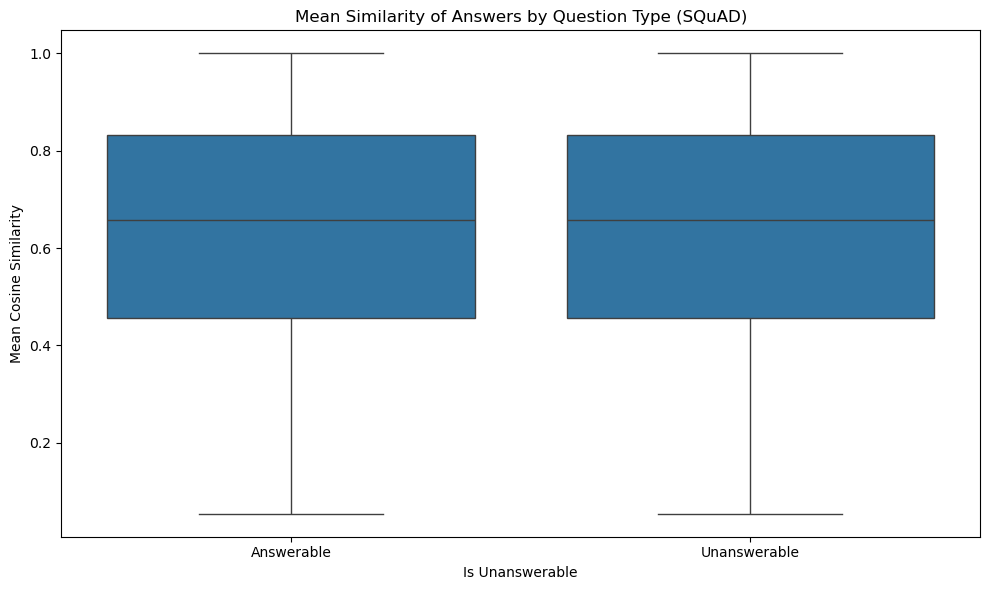

In [60]:
count_impossible = similarity_df_squad['is_impossible'].value_counts()
print(f"\nUnanswerable Questions Count:\n{count_impossible}")

# Compare unanswerable and answerable questions
plt.figure(figsize=(10, 6))
sns.boxplot(
    x="is_impossible",
    y="mean_similarity",
    data=similarity_df_squad,
    showfliers=False
)
plt.title("Mean Similarity of Answers by Question Type (SQuAD)")
plt.xlabel("Is Unanswerable")
plt.ylabel("Mean Cosine Similarity")
plt.xticks([0, 1], ["Answerable", "Unanswerable"])
plt.tight_layout()
plt.show()

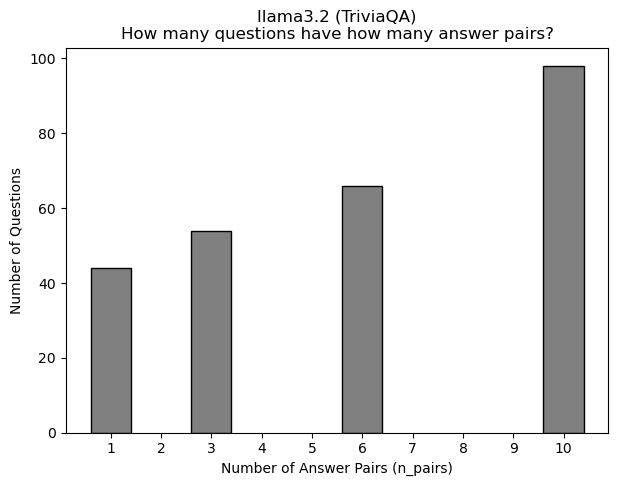

In [28]:
pair_counts = similarity_df_squad["n_pairs"].value_counts().sort_index()
plt.figure(figsize=(7, 5))
plt.bar(pair_counts.index, pair_counts.values, width=0.8, edgecolor='black', color='grey')
plt.xlabel("Number of Answer Pairs (n_pairs)")
plt.ylabel("Number of Questions")
plt.title("llama3.2 (TriviaQA)\nHow many questions have how many answer pairs?")
plt.xticks(range(1, 11))
plt.savefig("figures/metrics/sampling_consistency/distribution_npairs_trivia_llama3.2.png")
plt.show()

## Figures for consistency


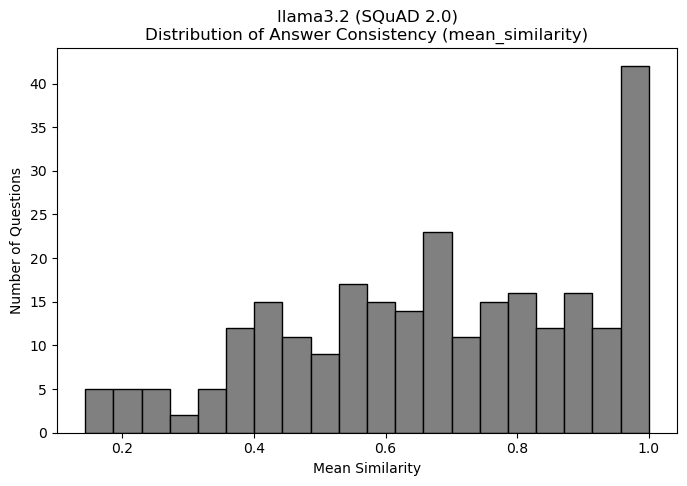

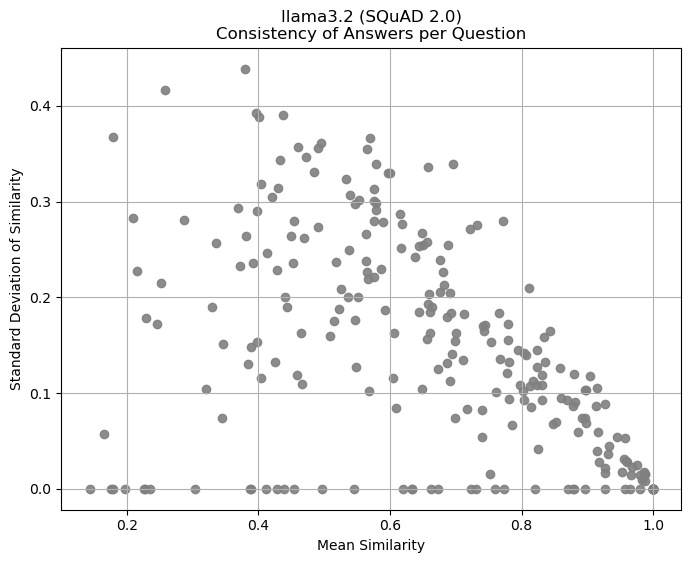

In [30]:
plt.figure(figsize=(8, 5))
plt.hist(similarity_df_squad["mean_similarity"], bins=20, color="grey", edgecolor='black')
plt.xlabel("Mean Similarity")
plt.ylabel("Number of Questions")
plt.title("llama3.2 (SQuAD 2.0)\nDistribution of Answer Consistency (mean_similarity)")
plt.savefig("figures/metrics/sampling_consistency/consistency_distribution_squad_llama3.2.png")
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(similarity_df_squad["mean_similarity"], similarity_df_squad["std_similarity"], alpha=0.9, color='grey')
plt.xlabel("Mean Similarity")
plt.ylabel("Standard Deviation of Similarity")
plt.title("llama3.2 (SQuAD 2.0)\nConsistency of Answers per Question")
plt.savefig("figures/metrics/sampling_consistency/consistency_std_mean_squad_llama3.2.png")
plt.grid(True)
plt.show()

- similarity values range broadly from ~0.3 to 1.0
- clear peak around 0.75–0.8, meaning most questions yield fairly consistent answers
- lower whisker extends down to ~0.3 -> low-consistency cases
- strong negative correlation between std and mean similarity -> Higher mean similarity implies lower variability among responses

### Generate Correctness

In [63]:
df_squad_original = pd.read_csv("data/SQuAD2_merged.csv")
df_squad_merged = df_parsed_squad.merge(df_squad_original[['id', 'answers']], on='id', how='left', suffixes=('', '_gt'))
df_squad_merged

,id,title,question,context,answers,is_impossible,prompt,question_id,sample_id,model_output,parsed_answer,parsed_confidence,answers_gt
0,57269ef4f1498d1400e8e52d,The_Sun_(United_Kingdom),What's another thing the paper showed hostilit...,Despite its initial opposition to the closures...,['promotion of right-wing ministers to the cab...,False,You are a QA assistant. Use the context to ans...,0,0,NaN,None,NaN,['promotion of right-wing ministers to the cab...
1,57269ef4f1498d1400e8e52d,The_Sun_(United_Kingdom),What's another thing the paper showed hostilit...,Despite its initial opposition to the closures...,['promotion of right-wing ministers to the cab...,False,You are a QA assistant. Use the context to ans...,0,1,NaN,None,NaN,['promotion of right-wing ministers to the cab...
2,57269ef4f1498d1400e8e52d,The_Sun_(United_Kingdom),What's another thing the paper showed hostilit...,Despite its initial opposition to the closures...,['promotion of right-wing ministers to the cab...,False,You are a QA assistant. Use the context to ans...,0,2,NaN,None,NaN,['promotion of right-wing ministers to the cab...
3,57269ef4f1498d1400e8e52d,The_Sun_(United_Kingdom),What's another thing the paper showed hostilit...,Despite its initial opposition to the closures...,['promotion of right-wing ministers to the cab...,False,You are a QA assistant. Use the context to ans...,0,3,NaN,None,NaN,['promotion of right-wing ministers to the cab...
4,57269ef4f1498d1400e8e52d,The_Sun_(United_Kingdom),What's another thing the paper showed hostilit...,Despite its initial opposition to the closures...,['promotion of right-wing ministers to the cab...,False,You are a QA assistant. Use the context to ans...,0,4,NaN,None,NaN,['promotion of right-wing ministers to the cab...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,572ff73b04bcaa1900d76f4b,Roman_Republic,How many Romans lived in Mithridate the Great'...,"Mithridates the Great was the ruler of Pontus,...","['80,000']",False,You are a QA assistant. Use the context to ans...,499,0,"Answer: 80,000.",80000,NaN,"['80,000']"
2496,572ff73b04bcaa1900d76f4b,Roman_Republic,How many Romans lived in Mithridate the Great'...,"Mithridates the Great was the ruler of Pontus,...","['80,000']",False,You are a QA assistant. Use the context to ans...,499,1,"""}{""answer"": ""80,000""}{""text"": ""Mithridates th...",80000,NaN,"['80,000']"
2497,572ff73b04bcaa1900d76f4b,Roman_Republic,How many Romans lived in Mithridate the Great'...,"Mithridates the Great was the ruler of Pontus,...","['80,000']",False,You are a QA assistant. Use the context to ans...,499,2,"A) 20,000\nB) 80,000\nC) 100,000\nD) 200,000\n...",b 80000,NaN,"['80,000']"
2498,572ff73b04bcaa1900d76f4b,Roman_Republic,How many Romans lived in Mithridate the Great'...,"Mithridates the Great was the ruler of Pontus,...","['80,000']",False,You are a QA assistant. Use the context to ans...,499,3,"Answer: 80,000.",80000,NaN,"['80,000']"


In [89]:
# Extract Ground Truth (als erstes Element der Antwortliste)
def extract_gt(answer_str):
    try:
        return eval(answer_str)[0]
    except:
        return None

df_squad_merged['gt_answer'] = df_squad_merged['answers'].apply(extract_gt)

# Filtere gültige Paare
df_squad_merged = df_squad_merged.dropna(subset=['parsed_answer', 'gt_answer'])

# Lade SBERT
model = SentenceTransformer('all-MiniLM-L6-v2')

# Berechne Similarity pro Antwort
def compute_similarity(row):
    emb1 = model.encode(row['parsed_answer'], convert_to_tensor=True)
    emb2 = model.encode(row['gt_answer'], convert_to_tensor=True)
    return float(util.cos_sim(emb1, emb2).item())

df_squad_merged['sbert_to_gt'] = df_squad_merged.apply(compute_similarity, axis=1)

# Aggregation pro Frage
agg_df_squad = df_squad_merged.groupby(['question_id', 'is_impossible'])['sbert_to_gt'].agg(['mean', 'std', 'min', 'max']).reset_index()



In [91]:
agg_df_squad.head(15)

,question_id,is_impossible,mean,std,min,max
0,1,False,0.781192,0.174767,0.624618,0.970495
1,2,False,0.563140,0.295703,0.207622,1.000000
2,3,False,0.810018,0.268675,0.620036,1.000000
3,4,False,0.394767,0.235151,0.228490,0.561044
4,5,False,0.772383,0.321899,0.544767,1.000000
5,6,False,0.734336,0.007958,0.726495,0.742406
6,7,False,0.697004,NaN,0.697004,0.697004
7,8,False,0.615649,0.466620,0.285698,0.945599
8,9,False,0.291776,NaN,0.291776,0.291776
9,11,False,0.751326,0.339666,0.159455,0.991973


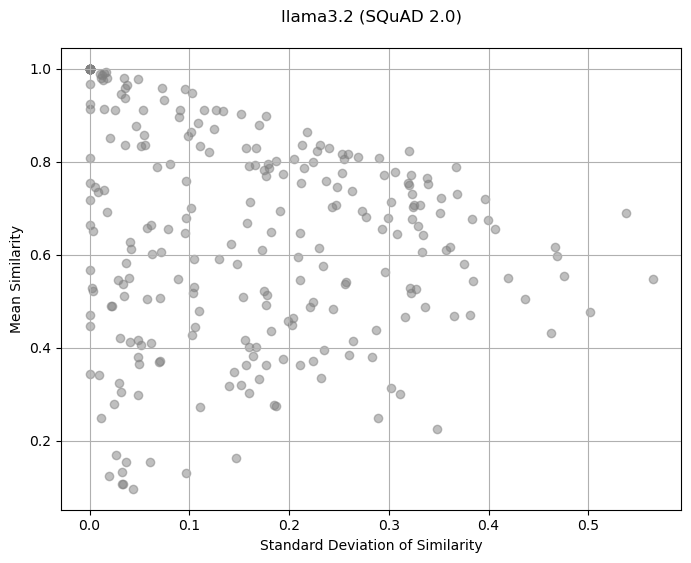

In [69]:
plt.figure(figsize=(8,6))
plt.scatter(agg_df['std'], agg_df['mean'], alpha=0.5, color='grey')
plt.xlabel("Standard Deviation of Similarity")
plt.ylabel("Mean Similarity")
plt.title("llama3.2 (SQuAD 2.0)\n")
plt.grid(True)
plt.show()

- The higher uncertainty (higher values of sdt), the lower the similarity to ground truth -> negative correlation between uncertainty and quality
- If model is not so certain (more variation), it is more likely wrong
- Std~0 implies no variation at all, but the quality (mean similarity) is not necessarily high\
    -> high consistency doesn't necessarily mean that the answer is correct
- Std>0.3 implies high uncertainty but low similarites at the same time (might be unanswerable questions -> CHECK)

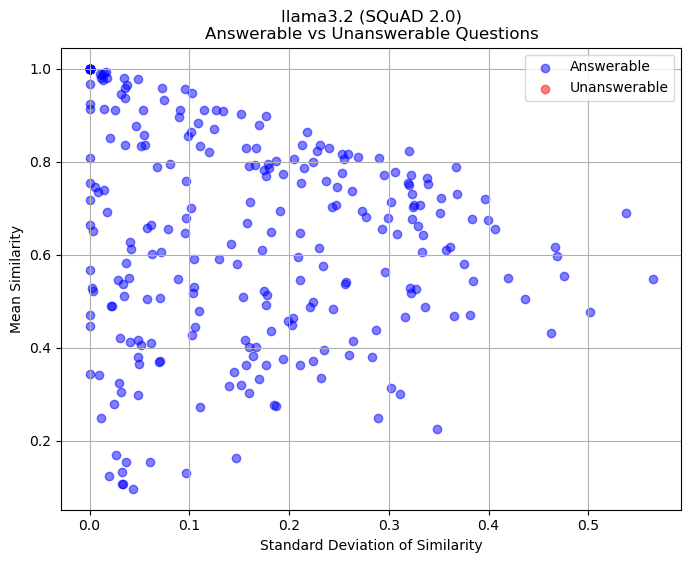

In [74]:
# Scatterplot of std vs mean similarity for unanswerable and answerable questions
df_ans = agg_df[agg_df['is_impossible'] == False]
df_unans = agg_df[agg_df['is_impossible'] == True]

plt.figure(figsize=(8,6))
plt.scatter(df_ans['std'], df_ans['mean'], alpha=0.5, label='Answerable', color='blue')
plt.scatter(df_unans['std'], df_unans['mean'], alpha=0.5, label='Unanswerable', color='red')
plt.xlabel("Standard Deviation of Similarity")
plt.ylabel("Mean Similarity")
plt.title("llama3.2 (SQuAD 2.0)\nAnswerable vs Unanswerable Questions")
plt.legend()
plt.grid(True)
plt.show()


# TriviaQA

In [7]:
df_trivia = pd.read_csv("output/llm_sample_consistency/trivia_llama_k5_topk.csv")
print(f"Loaded TriviaQA multi-sample data:")
print(f"- Total samples: {len(df_trivia)}")
print(f"- Unique questions: {df_trivia['question_id'].nunique()}")
print(f"- Samples per question: {len(df_trivia) / df_trivia['question_id'].nunique():.1f}")

Loaded TriviaQA multi-sample data:
- Total samples: 2500
- Unique questions: 500
- Samples per question: 5.0


In [ ]:
# Load functions
from parsing_and_evaluation import (
    parse_aggregate_evaluate_trivia_multi,
    parse_and_evaluate_trivia_multi, 
    aggregate_confidence_trivia,
    evaluate_trivia_aggregated,
    normalize_trivia_multi
)

In [8]:
df_parsed_trivia, df_agg_trivia, eval_df_trivia, acc_trivia = parse_aggregate_evaluate_trivia_multi(
    df_trivia, 
    group_col="question_id",
    similarity_threshold=0.8  # Threshold for clustering similar answers
)

print(f"\n✅ Multi-Sample TriviaQA Results (Modularized):")
print(f"   - Valid parsed samples: {df_parsed_trivia['parsed_answer'].notna().sum()}")
print(f"   - Questions with valid aggregations: {len(df_agg_trivia)}")
print(f"   - Aggregated accuracy: {acc_trivia:.3f}")


✅ Multi-Sample TriviaQA Results (Modularized):
   - Valid parsed samples: 2463
   - Questions with valid aggregations: 500
   - Aggregated accuracy: 0.022


In [75]:
df_parsed_trivia.head(15)

,question,question_id,question_source,answers,prompt,sample_id,model_output,parsed_answer,parsed_confidence
0,The result of dividing a number into one is ca...,0,http://www.odquiz.org.uk/,"['RECIPROCAL', 'reciprocal', 'Reciprocal', 'Re...",You are a fact-checking assistant. Answer the ...,0,(5 points)\n\nWhat is the result of dividing a...,is c the quotient,NaN
1,The result of dividing a number into one is ca...,0,http://www.odquiz.org.uk/,"['RECIPROCAL', 'reciprocal', 'Reciprocal', 'Re...",You are a fact-checking assistant. Answer the ...,1,"(A) Fraction, (B) Integer, (C) Decimal, (D) De...",is d},NaN
2,The result of dividing a number into one is ca...,0,http://www.odquiz.org.uk/,"['RECIPROCAL', 'reciprocal', 'Reciprocal', 'Re...",You are a fact-checking assistant. Answer the ...,2,(1) One\n(2) Zero\n(3) One-half\n(4) Square ro...,is $\boxed{4}$,NaN
3,The result of dividing a number into one is ca...,0,http://www.odquiz.org.uk/,"['RECIPROCAL', 'reciprocal', 'Reciprocal', 'Re...",You are a fact-checking assistant. Answer the ...,3,&quot;\n\nA) Quotient\nB) Remainder\nC) Produc...,is $\boxed{a}$,NaN
4,The result of dividing a number into one is ca...,0,http://www.odquiz.org.uk/,"['RECIPROCAL', 'reciprocal', 'Reciprocal', 'Re...",You are a fact-checking assistant. Answer the ...,4,NaN,None,NaN
5,In which London pub did Ronnie Kray murder Geo...,1,http://www.businessballs.com/,"['The Blind Beggar', 'blind beggar', 'Blind Be...",You are a fact-checking assistant. Answer the ...,0,A) The Lamb & Flag\nB) The Eagle and Child\nC)...,a the lamb & flag,NaN
6,In which London pub did Ronnie Kray murder Geo...,1,http://www.businessballs.com/,"['The Blind Beggar', 'blind beggar', 'Blind Be...",You are a fact-checking assistant. Answer the ...,1,A) The Eagle and Child\nB) The Spaniards Inn\n...,b the spaniards inn,NaN
7,In which London pub did Ronnie Kray murder Geo...,1,http://www.businessballs.com/,"['The Blind Beggar', 'blind beggar', 'Blind Be...",You are a fact-checking assistant. Answer the ...,2,A) The Eagle\nB) The Lamb & Flag\nC) The Crane...,a the eagle,NaN
8,In which London pub did Ronnie Kray murder Geo...,1,http://www.businessballs.com/,"['The Blind Beggar', 'blind beggar', 'Blind Be...",You are a fact-checking assistant. Answer the ...,3,"In 1962, Ronnie Kray was sentenced to 30 years...",a the lamb & flag,NaN
9,In which London pub did Ronnie Kray murder Geo...,1,http://www.businessballs.com/,"['The Blind Beggar', 'blind beggar', 'Blind Be...",You are a fact-checking assistant. Answer the ...,4,A) The Sherlock Holmes pub \nB) The Sherlock H...,is e,NaN


In [16]:
from sentence_transformers import SentenceTransformer, util
import numpy as np
model = SentenceTransformer("all-MiniLM-L6-v2")
similarity_stats_trivia = []
grouped = df_parsed_trivia.groupby("question_id")

for qid, group in grouped:
    answers = group["parsed_answer"].dropna().tolist()
    
    if len(answers) >= 2:
        embeddings = model.encode(answers, convert_to_tensor=True)
        sim_matrix = util.pytorch_cos_sim(embeddings, embeddings).cpu().numpy()
        i_upper = np.triu_indices(len(answers), k=1)
        sim_scores = sim_matrix[i_upper]
        
        similarity_stats_trivia.append({
            "question_id": qid,
            "num_answers": len(answers),
            "mean_similarity": sim_scores.mean(),
            "std_similarity": sim_scores.std(),
            "n_pairs": len(sim_scores)
        })

# In DataFrame umwandeln
similarity_df_trivia = pd.DataFrame(similarity_stats_trivia)

In [17]:
print(similarity_df_trivia.shape)
similarity_df_trivia.head(15)


(499, 5)


,question_id,num_answers,mean_similarity,std_similarity,n_pairs
0,0,4,0.288603,0.163215,6
1,1,5,0.281912,0.258958,10
2,2,5,0.274300,0.180328,10
3,3,5,0.322262,0.254639,10
4,4,4,0.440509,0.252386,6
5,5,5,0.273759,0.238799,10
6,6,5,0.273370,0.126282,10
7,7,4,0.644452,0.355548,6
8,8,5,0.336051,0.177401,10
9,9,5,0.210508,0.175956,10


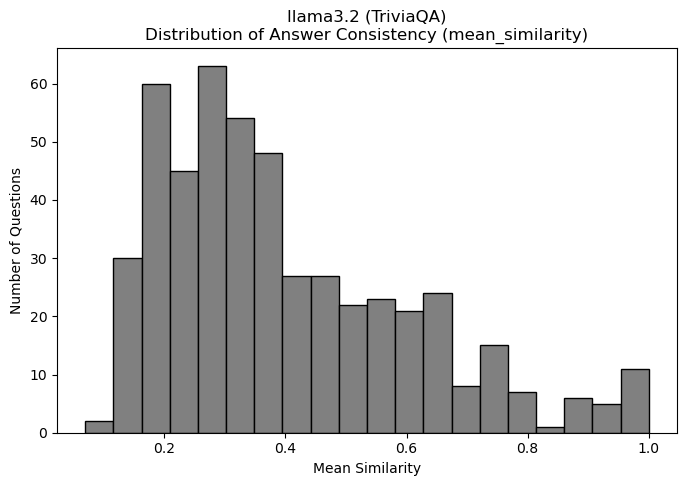

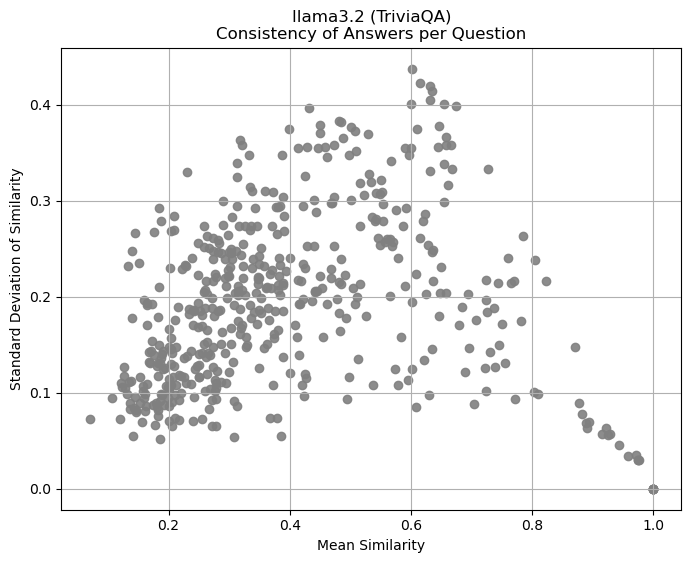

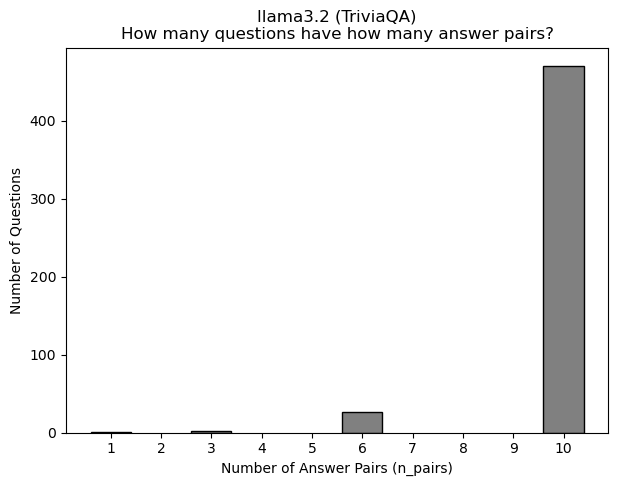

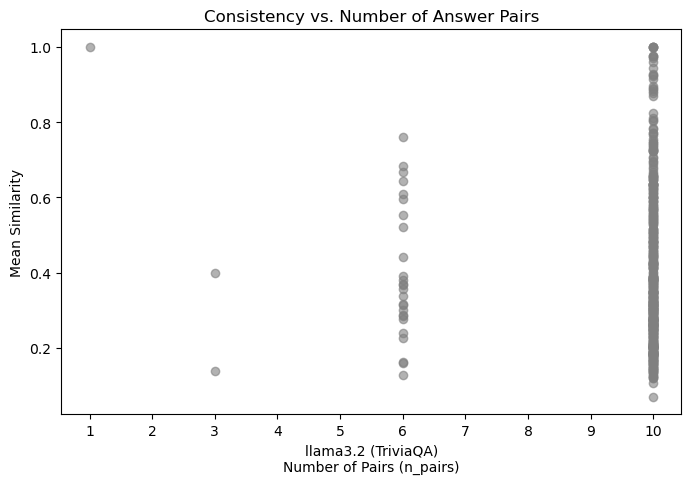

In [18]:
plt.figure(figsize=(8, 5))
plt.hist(similarity_df_trivia["mean_similarity"], bins=20, color="grey", edgecolor='black')
plt.xlabel("Mean Similarity")
plt.ylabel("Number of Questions")
plt.title("llama3.2 (TriviaQA)\nDistribution of Answer Consistency (mean_similarity)")
plt.savefig("figures/metrics/sampling_consistency/consistency_distribution_trivia_llama3.2.png")
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(similarity_df_trivia["mean_similarity"], similarity_df_trivia["std_similarity"], alpha=0.9, color='grey')
plt.xlabel("Mean Similarity")
plt.ylabel("Standard Deviation of Similarity")
plt.title("llama3.2 (TriviaQA)\nConsistency of Answers per Question")
plt.grid(True)
plt.savefig("figures/metrics/sampling_consistency/consistency_std_mean_trivia_llama3.2.png")
plt.show()

pair_counts = similarity_df_trivia["n_pairs"].value_counts().sort_index()
plt.figure(figsize=(7, 5))
plt.bar(pair_counts.index, pair_counts.values, width=0.8, edgecolor='black', color='grey')
plt.xlabel("Number of Answer Pairs (n_pairs)")
plt.ylabel("Number of Questions")
plt.title("llama3.2 (TriviaQA)\nHow many questions have how many answer pairs?")
plt.xticks(range(1, 11))
plt.savefig("figures/metrics/sampling_consistency/distribution_npairs_trivia_llama3.2.png")
plt.show()

plt.figure(figsize=(8, 5))
plt.scatter(similarity_df_trivia["n_pairs"], similarity_df_trivia["mean_similarity"], alpha=0.6, color='grey')
plt.xlabel("llama3.2 (TriviaQA)\nNumber of Pairs (n_pairs)")
plt.ylabel("Mean Similarity")
plt.title("Consistency vs. Number of Answer Pairs")
plt.xticks(range(1, 11))
plt.savefig("figures/metrics/sampling_consistency/npairs_consistencymean_trivia_llama3.2.png")
plt.show()

<Figure size 700x500 with 0 Axes>

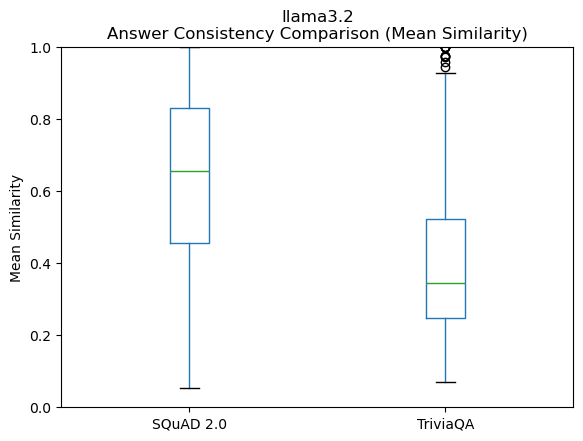

In [55]:
# Compare SQuAD and TriviaQA
similarity_df_squad["dataset"] = "SQuAD 2.0"
similarity_df_trivia["dataset"] = "TriviaQA"
combined = pd.concat([similarity_df_squad, similarity_df_trivia], ignore_index=True)

plt.figure(figsize=(7, 5))
combined.boxplot(by="dataset", column="mean_similarity", grid=False)
plt.title("llama3.2\nAnswer Consistency Comparison (Mean Similarity)")
plt.suptitle("")
plt.ylabel("Mean Similarity")
plt.xlabel("")
plt.ylim(0, 1)
plt.savefig("figures/metrics/sampling_consistency/consistency_comparison_squad_trivia_llama3.2.png")
plt.show()

### Generate Correctness

In [78]:
df_trivia_original = pd.read_csv("data/triviaqa-unfiltered/trivia_all.csv")
df_trivia_merged = df_parsed_trivia.merge(df_trivia_original[['question', 'answers']], on='question', how='left', suffixes=('', '_gt'))
df_trivia_merged.head(15)

,question,question_id,question_source,answers,prompt,sample_id,model_output,parsed_answer,parsed_confidence,answers_gt
0,The result of dividing a number into one is ca...,0,http://www.odquiz.org.uk/,"['RECIPROCAL', 'reciprocal', 'Reciprocal', 'Re...",You are a fact-checking assistant. Answer the ...,0,(5 points)\n\nWhat is the result of dividing a...,is c the quotient,NaN,"['RECIPROCAL', 'reciprocal', 'Reciprocal', 'Re..."
1,The result of dividing a number into one is ca...,0,http://www.odquiz.org.uk/,"['RECIPROCAL', 'reciprocal', 'Reciprocal', 'Re...",You are a fact-checking assistant. Answer the ...,1,"(A) Fraction, (B) Integer, (C) Decimal, (D) De...",is d},NaN,"['RECIPROCAL', 'reciprocal', 'Reciprocal', 'Re..."
2,The result of dividing a number into one is ca...,0,http://www.odquiz.org.uk/,"['RECIPROCAL', 'reciprocal', 'Reciprocal', 'Re...",You are a fact-checking assistant. Answer the ...,2,(1) One\n(2) Zero\n(3) One-half\n(4) Square ro...,is $\boxed{4}$,NaN,"['RECIPROCAL', 'reciprocal', 'Reciprocal', 'Re..."
3,The result of dividing a number into one is ca...,0,http://www.odquiz.org.uk/,"['RECIPROCAL', 'reciprocal', 'Reciprocal', 'Re...",You are a fact-checking assistant. Answer the ...,3,&quot;\n\nA) Quotient\nB) Remainder\nC) Produc...,is $\boxed{a}$,NaN,"['RECIPROCAL', 'reciprocal', 'Reciprocal', 'Re..."
4,The result of dividing a number into one is ca...,0,http://www.odquiz.org.uk/,"['RECIPROCAL', 'reciprocal', 'Reciprocal', 'Re...",You are a fact-checking assistant. Answer the ...,4,NaN,None,NaN,"['RECIPROCAL', 'reciprocal', 'Reciprocal', 'Re..."
5,In which London pub did Ronnie Kray murder Geo...,1,http://www.businessballs.com/,"['The Blind Beggar', 'blind beggar', 'Blind Be...",You are a fact-checking assistant. Answer the ...,0,A) The Lamb & Flag\nB) The Eagle and Child\nC)...,a the lamb & flag,NaN,"['The Blind Beggar', 'blind beggar', 'Blind Be..."
6,In which London pub did Ronnie Kray murder Geo...,1,http://www.businessballs.com/,"['The Blind Beggar', 'blind beggar', 'Blind Be...",You are a fact-checking assistant. Answer the ...,1,A) The Eagle and Child\nB) The Spaniards Inn\n...,b the spaniards inn,NaN,"['The Blind Beggar', 'blind beggar', 'Blind Be..."
7,In which London pub did Ronnie Kray murder Geo...,1,http://www.businessballs.com/,"['The Blind Beggar', 'blind beggar', 'Blind Be...",You are a fact-checking assistant. Answer the ...,2,A) The Eagle\nB) The Lamb & Flag\nC) The Crane...,a the eagle,NaN,"['The Blind Beggar', 'blind beggar', 'Blind Be..."
8,In which London pub did Ronnie Kray murder Geo...,1,http://www.businessballs.com/,"['The Blind Beggar', 'blind beggar', 'Blind Be...",You are a fact-checking assistant. Answer the ...,3,"In 1962, Ronnie Kray was sentenced to 30 years...",a the lamb & flag,NaN,"['The Blind Beggar', 'blind beggar', 'Blind Be..."
9,In which London pub did Ronnie Kray murder Geo...,1,http://www.businessballs.com/,"['The Blind Beggar', 'blind beggar', 'Blind Be...",You are a fact-checking assistant. Answer the ...,4,A) The Sherlock Holmes pub \nB) The Sherlock H...,is e,NaN,"['The Blind Beggar', 'blind beggar', 'Blind Be..."


In [83]:
# Extract Ground Truth
def extract_gt(answer_str):
    try:
        return eval(answer_str)[0]
    except:
        return None

df_trivia_merged['gt_answer'] = df_trivia_merged['answers'].apply(extract_gt)
df_trivia_merged = df_trivia_merged.dropna(subset=['parsed_answer', 'gt_answer'])

# Compute SBERT similarity to ground truth
def compute_similarity(row):
    emb1 = model.encode(row['parsed_answer'], convert_to_tensor=True)
    emb2 = model.encode(row['gt_answer'], convert_to_tensor=True)
    return float(util.cos_sim(emb1, emb2).item())

df_trivia_merged['sbert_to_gt'] = df_trivia_merged.apply(compute_similarity, axis=1)

# Aggregation pro Frage
agg_df_trivia = df_trivia_merged.groupby('question_id')['sbert_to_gt'].agg(['mean', 'std', 'min', 'max']).reset_index()

In [85]:
agg_df_trivia.head(15)

,question_id,mean,std,min,max
0,0,0.173989,0.113735,0.058468,0.325838
1,1,0.186323,0.066193,0.074141,0.250226
2,2,0.190998,0.094613,0.106202,0.298147
3,3,0.388431,0.181409,0.144536,0.634027
4,4,0.224235,0.086239,0.147279,0.298903
5,5,0.397257,0.348015,0.118677,1.000000
6,6,0.382174,0.232342,0.174801,0.646148
7,7,0.541725,0.217038,0.216168,0.650244
8,8,0.170895,0.065432,0.077648,0.245814
9,9,0.281013,0.154804,0.095518,0.475234


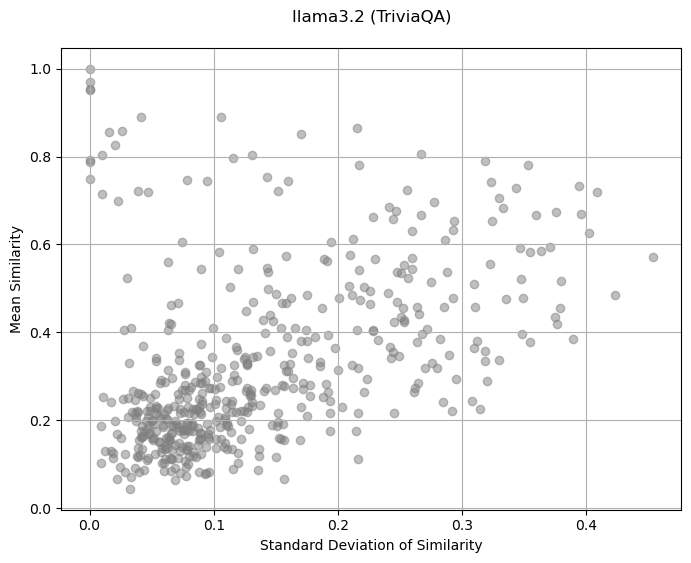

In [86]:
plt.figure(figsize=(8,6))
plt.scatter(agg_df_trivia['std'], agg_df_trivia['mean'], alpha=0.5, color='grey')
plt.xlabel("Standard Deviation of Similarity")
plt.ylabel("Mean Similarity")
plt.title("llama3.2 (TriviaQA)\n")
plt.grid(True)
plt.show()

- Model gives repeated wrong answers, which differ not much -> is consistently wrong
- not strong relationship between uncertainty and consistency -> uncertainty is not a good measurement for quality

# Comparison

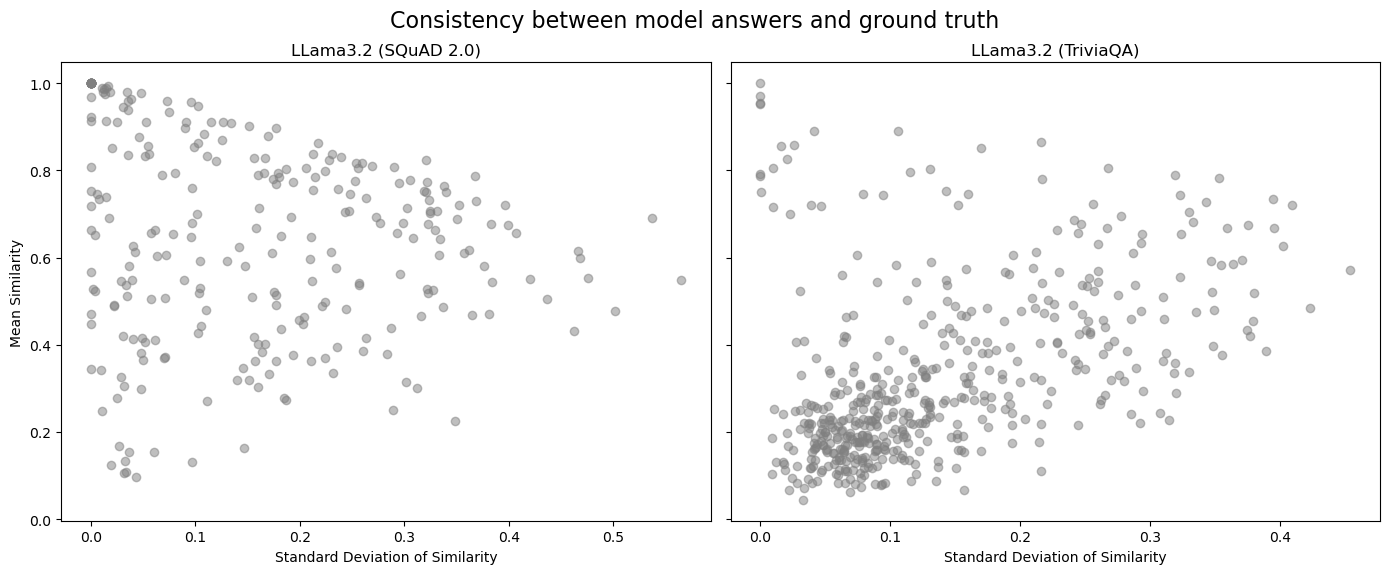

In [97]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

axes[0].scatter(agg_df_squad['std'], agg_df_squad['mean'], alpha=0.5, color='gray')
axes[0].set_title("LLama3.2 (SQuAD 2.0)")
axes[0].set_xlabel("Standard Deviation of Similarity")
axes[0].set_ylabel("Mean Similarity")

axes[1].scatter(agg_df_trivia['std'], agg_df_trivia['mean'], alpha=0.5, color='gray')
axes[1].set_title("LLama3.2 (TriviaQA)")
axes[1].set_xlabel("Standard Deviation of Similarity")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.suptitle("Consistency between model answers and ground truth", fontsize=16)
plt.show()

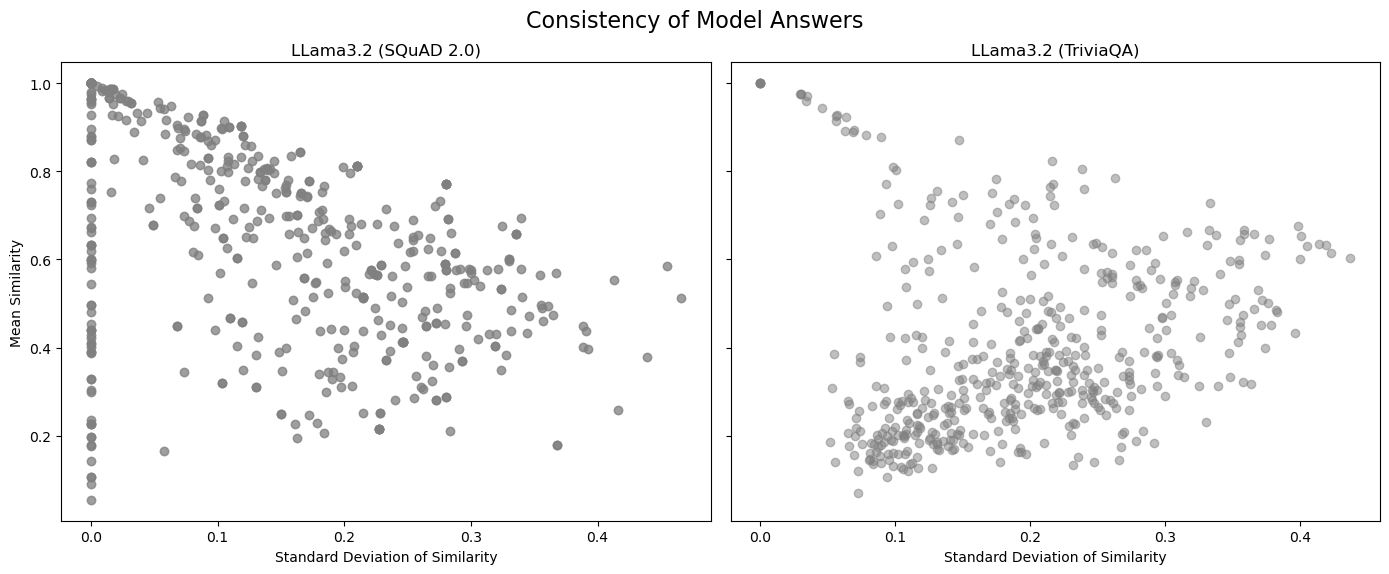

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

axes[0].scatter(similarity_df_squad['std_similarity'], similarity_df_squad['mean_similarity'], alpha=0.5, color='grey')
axes[0].set_title("LLama3.2 (SQuAD 2.0)")
axes[0].set_xlabel("Standard Deviation of Similarity")
axes[0].set_ylabel("Mean Similarity")

axes[1].scatter(similarity_df_trivia['std_similarity'], similarity_df_trivia['mean_similarity'], alpha=0.5, color='grey')
axes[1].set_title("LLama3.2 (TriviaQA)")
axes[1].set_xlabel("Standard Deviation of Similarity")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.suptitle("Consistency of Model Answers ", fontsize=16)
plt.show()